<a href="https://colab.research.google.com/github/najmieh-s/Regression-Models/blob/main/Regression_Model_and_noise_with_advertising_dataset_with_evaluations_Fourth_Work_Frame_Developed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction **

In [9]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


In [12]:
# Reading the files:

def read_data():

    df_bottle =pd.read_csv("./Advertising dataset.csv")

    return df_bottle

print(read_data())    

        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [13]:
# Here we DO the preprocessing 
'''
def clean(df):
    df = df[[" ", " ", " "]]
    df.rename( columns = { 

        " ":" ",
        " ":" ",

    }, inplace = True)

    return df
'''

'\ndef clean(df):\n    df = df[[" ", " ", " "]]\n    df.rename( columns = { \n\n        " ":" ",\n        " ":" ",\n\n    }, inplace = True)\n\n    return df\n'

In [14]:
# Here remove none values 

def impute(df):
     for name in df.select_dtypes("number"):
         df[name] = df[name].fillna(method="ffill")

     for name in df.select_dtypes("category"):
         df[name] = df[name].fillna("None")    

     return df
         

In [15]:

def load_data():
     
    # Here we read the data
    df_bottle = read_data()
    
    df_bottle = impute(df_bottle)

    return df_bottle


In [16]:

# Loading the data

df_bottle = load_data()


print(df_bottle)

        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [17]:

# Looking at the data
df_bottle.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
# Dimension of the data
df_bottle.shape

(200, 4)

In [19]:
# State of the data
df_bottle.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.0000
mean,145.377500,23.253000,30.738000,14.1050
std,85.771352,14.932955,21.577994,5.2172
min,0.700000,0.000000,0.300000,1.6000
25%,70.250000,9.825000,13.050000,10.4000
50%,145.100000,22.400000,26.050000,13.0500
75%,218.425000,36.650000,45.100000,17.4000
max,296.400000,49.600000,114.000000,27.0000


In [20]:
df_bottle.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [21]:
null_count = df_bottle.isnull().sum()
null_count


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [22]:
# Here we calculate the null percentage

null_count_percentage = round((null_count/df_bottle.shape[0])* 100, 2)

for val in null_count_percentage.index:
    print(val, "\t", null_count_percentage[val])


TV 	 0.0
radio 	 0.0
newspaper 	 0.0
sales 	 0.0


In [23]:
for val in null_count.index:
     print(val, "\t", null_count[val])
     

TV 	 0
radio 	 0
newspaper 	 0
sales 	 0


In [24]:
# Here we acquire the correlation between the variables 
df_bottle.corr()


,TV,radio,newspaper,sales
TV,1.000000,0.063275,0.052211,0.744296
radio,0.063275,1.000000,0.358478,0.577979
newspaper,0.052211,0.358478,1.000000,0.211051
sales,0.744296,0.577979,0.211051,1.000000


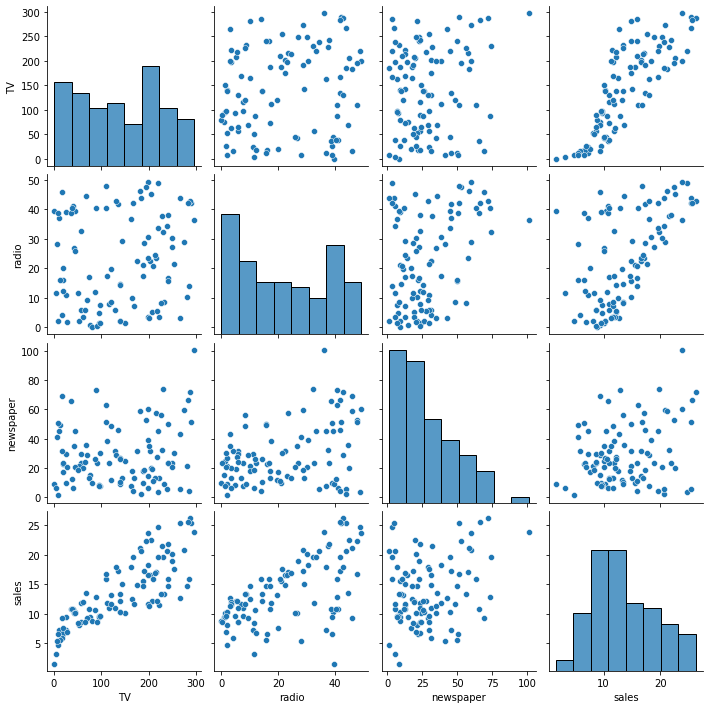

In [25]:
# Looking at the graphical presentation of the data
sns.pairplot(data=df_bottle.sample(100))


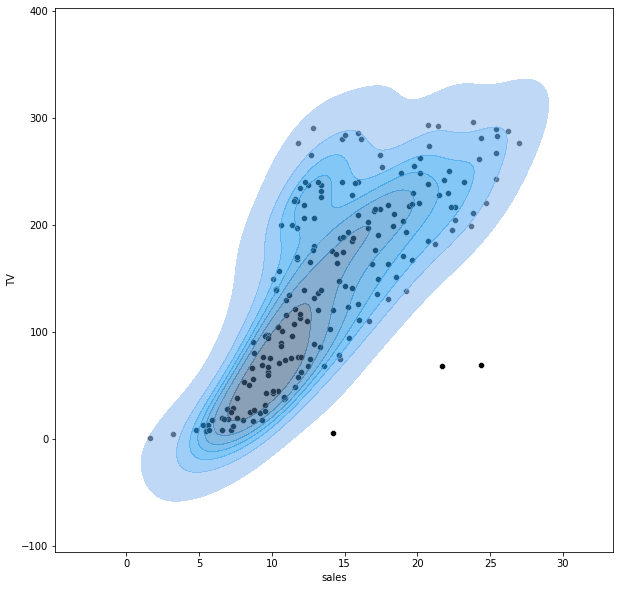

In [26]:

fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(data=df_bottle, x="sales", y="TV", color="k", ax=ax)
sns.kdeplot(data=df_bottle, x="sales", y="TV", levels=8, fill=True, alpha=0.6, cut=3, ax=ax )

plt.show()


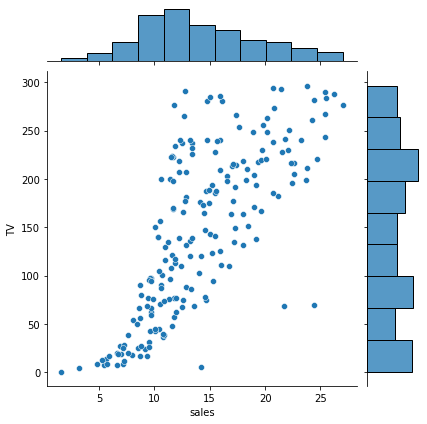

In [27]:

sns.jointplot(data=df_bottle, x="sales", y="TV")


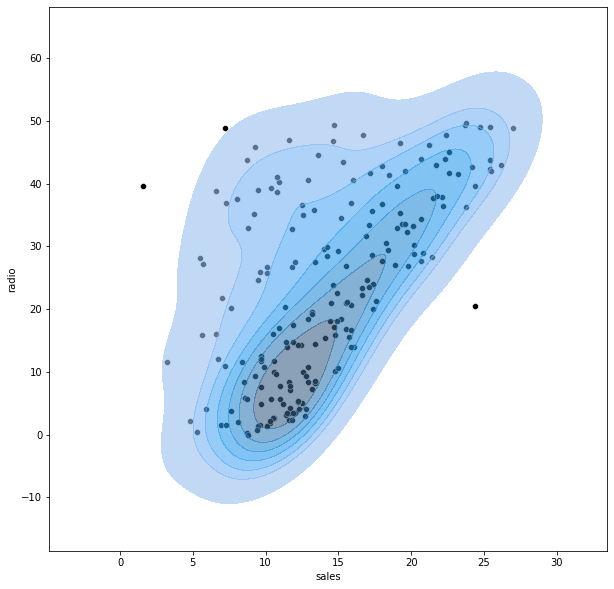

In [28]:
# The relationship between Sales and Radio Ads of the penguins

fig, ax= plt.subplots(figsize=(10, 10))

sns.scatterplot(data=df_bottle, x="sales", y="radio", color="k", ax=ax)
sns.kdeplot(data=df_bottle, x="sales", y="radio", levels=8, fill=True, alpha= 0.6, cut=3, ax=ax)

plt.show()


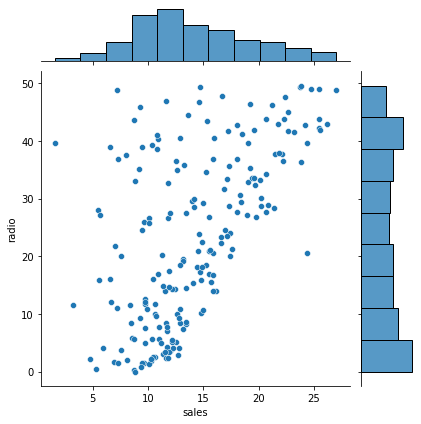

In [29]:

sns.jointplot(data=df_bottle, x="sales", y="radio")


In [30]:

# Spliting the data into train and test sets

print(df_bottle.shape)
print(df_bottle.columns)

# These are the features. It  means we make prediction based on these two factors
X= df_bottle['sales']
y= df_bottle['radio']


# We split the train and test function here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.35, shuffle=True)

# Printing the shape of the train sets
print('X_train' )
print(X_train.head())
print(X_train.shape)

# Printing the shape of the train sets
print('y_train' )
print(y_train.head())
print(y_train.shape)

# Printing the shape of the test sets
print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)

# Prinintg the shape of y test 
print('')
print('y_test: ')
print(y_test.head())
print(y_test.shape)


(200, 4)
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')
X_train
31     11.9
39     21.5
184    17.6
78     14.2
17     24.4
Name: sales, dtype: float64
(130,)
y_train
31     17.4
39     37.7
184    21.3
78     29.9
17     39.6
Name: radio, dtype: float64
(130,)

X_test : 
104    20.7
128    24.7
49      9.7
34      9.5
64     18.0
Name: sales, dtype: float64
(70,)

y_test: 
104    34.3
128    49.0
49     11.7
34      1.4
64     42.8
Name: radio, dtype: float64
(70,)


In [31]:
'''
Evaluates different score for the predictes data
'''
def evaluate(y_test_reshaped, y_predict):
    
    print("Mean absolute error: %.2f" %np.mean(np.absolute(y_predict - y_test_reshaped)))
    print("Residual sum of squares (MSE): %.2f" %np.mean((y_predict - y_test_reshaped) ** 2))
    print("R2-score: %.2f" %r2_score(y_predict, y_test_reshaped))


130
70
130
70


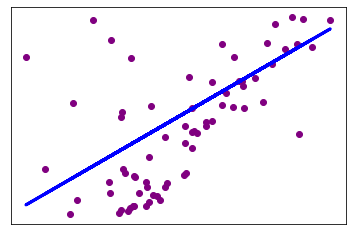

In [93]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

X_train, X_test, y_train, y_test

lr=LinearRegression()
x_train_reshaped = X_train.values.reshape(-1,1)
y_train_reshaped = y_train.values.reshape(-1,1)
x_test_reshaped = X_test.values.reshape(-1,1)
y_test_reshaped = y_test.values.reshape(-1,1)

#print(x_train_reshaped)
#print(y_train_reshaped)

lr=LinearRegression()
lr.fit(x_train_reshaped,y_train_reshaped)
y_predict=lr.predict(x_test_reshaped)


plt.scatter(x_test_reshaped, y_test, color="purple")
plt.plot(x_test_reshaped, y_predict, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()




In [94]:
'''
Here we print the coeffecient of the model with this function!

'''
def coeffecients(model):
    print("Coefficients of the model: ", model.coef_)
    print("Intercept of the model:  ", model.intercept_)
    


In [95]:
# How model is performing
print("LinearRegression score: %.2f" %lr.score(x_train_reshaped, y_train_reshaped))
coeffecients(lr)
evaluate(y_test_reshaped, y_predict)

del lr

LinearRegression score: 0.33
Coefficients of the model:  [[1.72497613]]
Intercept of the model:   [0.01181208]
Mean absolute error: 9.90
Residual sum of squares (MSE): 155.80
R2-score: -0.64


**Here we add the noise**

In [99]:
# Here we genrate a random number as a noise 

import numpy as np

random_numbers_1 = np.empty(100000)
random_numbers_2 = np.empty(100000)

for i in range(70):
    random_numbers_1[i] = np.random.random()
    print(random_numbers_1[i])

for i in range(130):
    random_numbers_2[i] = np.random.random()
    print(random_numbers_2[i])


0.45718302128741006
0.8034030486896778
0.6255533708799482
0.9884001665828273
0.9856414202961317
0.0671752815838137
0.5896386430980575
0.0890320806269187
0.20038492831875554
0.4535523027682359
0.7567294917192199
0.7355457815376637
0.929083150820295
0.9743933014432113
0.7832131032907635
0.5743642580337817
0.14460672053966428
0.45454260859580164
0.07687492519772021
0.1632523842735345
0.9250258786164632
0.6753437847418023
0.4222661494944149
0.8032815280869267
0.6453693689688152
0.8731790719187538
0.6203448759751559
0.3013269300652941
0.7832951808875482
0.012759261049082982
0.5124532587620426
0.19481082517336368
0.7144689704612305
0.8181733044994727
0.8623515084836579
0.17447705176968775
0.37917501304827606
0.01556822000335345
0.1067062969678284
0.8089789482731004
0.10066717923796364
0.7151256245365557
0.6284086269095644
0.6101983391107672
0.6309699611300731
0.2531438117136192
0.15033854746534736
0.5267251617250869
0.5305363533874933
0.08858264601545174
0.24399313937683142
0.283691025110179

In [103]:
# Here we add the noise to the data

X_train, X_test, y_train, y_test

print("X_train before noise: ", X_train)
print("X_test before noise: ", X_test)
print("y_train before noise: ", y_train)
print("y_test before noise: ", y_test)

for i in range(70):
     X_test_with_noise  = X_test.mul(random_numbers_1[i])
     y_test_with_noise  = y_test.mul(random_numbers_1[i])

for i in range(130):
     X_train_with_noise = X_train.mul(random_numbers_2[i])
     y_train_with_noise = y_train.mul(random_numbers_2[i])     

print("X_train with noise: ", X_train_with_noise)
print("X_test with noise: ", y_test_with_noise)
print("y_train with noise: ", y_train_with_noise)
print("y_test with noise: ", y_test_with_noise)



X_train before noise:  31     11.9
39     21.5
184    17.6
78     14.2
17     24.4
       ... 
127     8.8
166     8.0
142    20.1
193    19.6
69     22.3
Name: sales, Length: 130, dtype: float64
X_test before noise:  104    20.7
128    24.7
49      9.7
34      9.5
64     18.0
       ... 
146    13.2
124    19.7
0      22.1
162    14.9
21     12.5
Name: sales, Length: 70, dtype: float64
y_train before noise:  31     17.4
39     37.7
184    21.3
78     29.9
17     39.6
       ... 
127     0.0
166    37.6
142    33.2
193    42.0
69     43.9
Name: radio, Length: 130, dtype: float64
y_test before noise:  104    34.3
128    49.0
49     11.7
34      1.4
64     42.8
       ... 
146     7.3
124    32.3
0      37.8
162    18.1
21      5.1
Name: radio, Length: 70, dtype: float64
X_train with noise:  31     3.094977
39     5.591766
184    4.577445
78     3.693166
17     6.346004
         ...   
127    2.288723
166    2.080657
142    5.227651
193    5.097610
69     5.799832
Name: sales, Length: 13

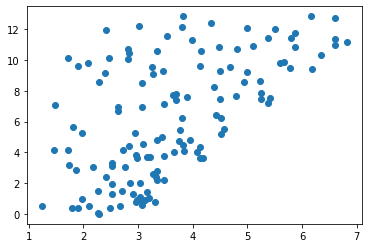

In [104]:
X_train_with_noise, y_train_with_noise, X_test_with_noise, y_test_with_noise

plt.scatter(X_train_with_noise, y_train_with_noise)
plt.show()


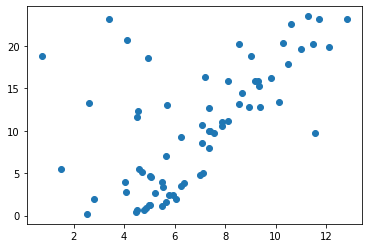

In [105]:
X_train_with_noise, y_train_with_noise, X_test_with_noise, y_test_with_noise

plt.scatter(X_test_with_noise, y_test_with_noise)
plt.show()


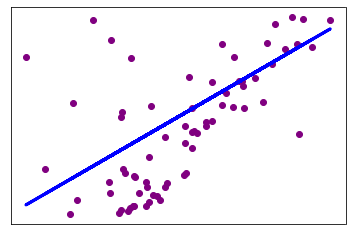

In [106]:
# Re-execute the Regression Model
X_train_with_noise, y_train_with_noise, X_test_with_noise, y_test_with_noise


lr=LinearRegression()
noisy_reshaped_x_train = X_train_with_noise.values.reshape(-1,1)
noisy_reshaped_y_train = y_train_with_noise.values.reshape(-1,1)
noisy_reshaped_x_test = X_test_with_noise.values.reshape(-1,1)
noisy_reshaped_y_test = y_test_with_noise.values.reshape(-1,1)

lr_1=LinearRegression()
lr_1.fit(noisy_reshaped_x_train ,noisy_reshaped_y_train)
y_predict_1=lr_1.predict(noisy_reshaped_x_test)

plt.scatter(noisy_reshaped_x_test, noisy_reshaped_y_test, color="purple")
plt.plot(noisy_reshaped_x_test, y_predict_1, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [107]:
# How model is performing
print("LinearRegression score: %.2f" %lr_1.score(noisy_reshaped_x_train, noisy_reshaped_y_train))
coeffecients(lr_1)
evaluate(noisy_reshaped_y_test, y_predict_1)

del lr_1

LinearRegression score: 0.33
Coefficients of the model:  [[1.72497613]]
Intercept of the model:   [0.00307211]
Mean absolute error: 4.70
Residual sum of squares (MSE): 35.06
R2-score: -0.64
